# Project: Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Internet Movie Database (IMDb), including user ratings and revenue.Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Creating a function to read the csv file
# Reading the csv file

def data(arg):
    '''
    This function creates the dataframe for the csv provided as an argument
    input: csv filename
    output: processed dataframe of the csv provided
    '''
    df = pd.read_csv(arg)
    return df

df = data('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> In this section we will explore the perculiarities of the data

### General Properties

In [3]:
# looking at the first 3 rows of the dataframe
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# looking at the shape of the dataframe
df.shape
# 10,866 rows and 21 columns

(10866, 21)

In [5]:
# looking at the first 3 rows of the datafra
df.info()
# the dataframe has null values on 8 of its columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()
# Observing the columns with financial information, you'd that there a 0 value entries, these will need to be taken care of

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#Finally we will check if there are any duplicates in the data
sum(df.duplicated()) # The result of this code shows that there is one duplicate, we'll expand this in the next line so we can see which of the rows has the duplicate

df[df.duplicated()]
# The Tekken row fo rthe movie Tekken is duplicated, we'll need to remove this in the data cleaning section

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> As we've see in the cells above, the dataframe 10,886 rows, which contain 1 duplicated cell as well as an uncessarily large number of cells, also, when viewing the budget and revenue, we can see that are are rows which have `0` as values. We'l be dropping 5 columns and getting rid of rows with null values
1. Drop unncessary rows
2. Drop null rows
3. Remove `0` values from the financial data
4. Remove the duplicated row

In [8]:
# dropping the columns
df.drop(columns=['homepage','id','imdb_id','overview','tagline'], inplace = True)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [9]:
# Dropping the null values
df.dropna(inplace=True)

In [10]:
# Data has been reduced to 8,667 rows
df.shape

(8667, 16)

> The approach **(↓)** here was gotten from the following link\
> https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

In [11]:
# Dropping the rows with 0 from budget or revenue
df = df[(df.budget != 0) & (df.revenue != 0)]

In [12]:
# Confirming that the 0 values are gone
sum(df.budget == 0)

0

In [13]:
# Removing duplicates
df.drop_duplicates(inplace = True)

In [14]:
# Confirming the duplicates are gone
sum(df.duplicated())

0

### 1. Has the average runtime of movies increased from an annual point of view
If the above is True, do longer runtimes mean relate to higher ratings or popularity.

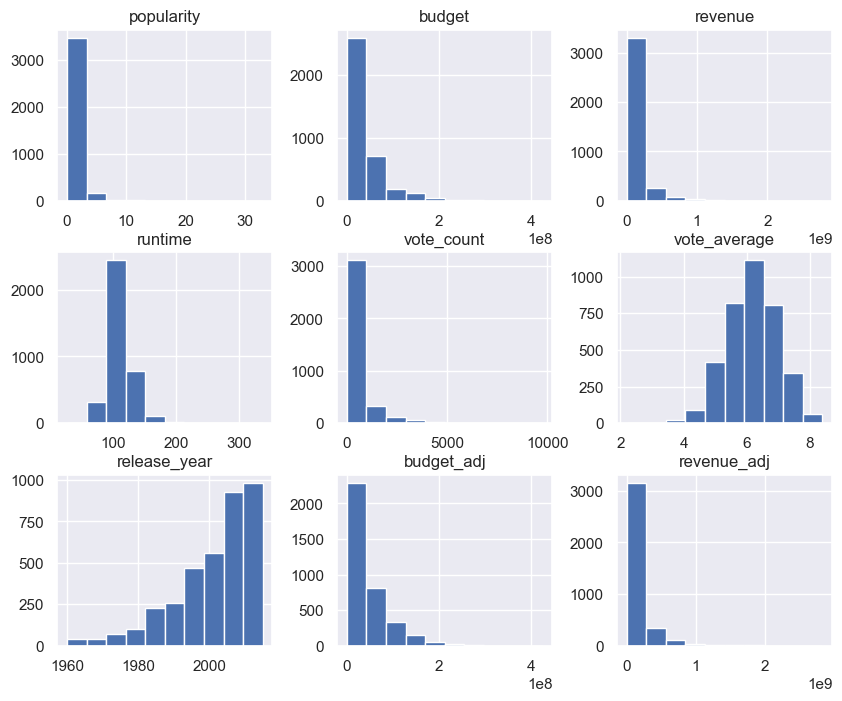

In [15]:
# We wil first do perform a general exploration of the cleaned data set
df.hist(figsize=(10,8));

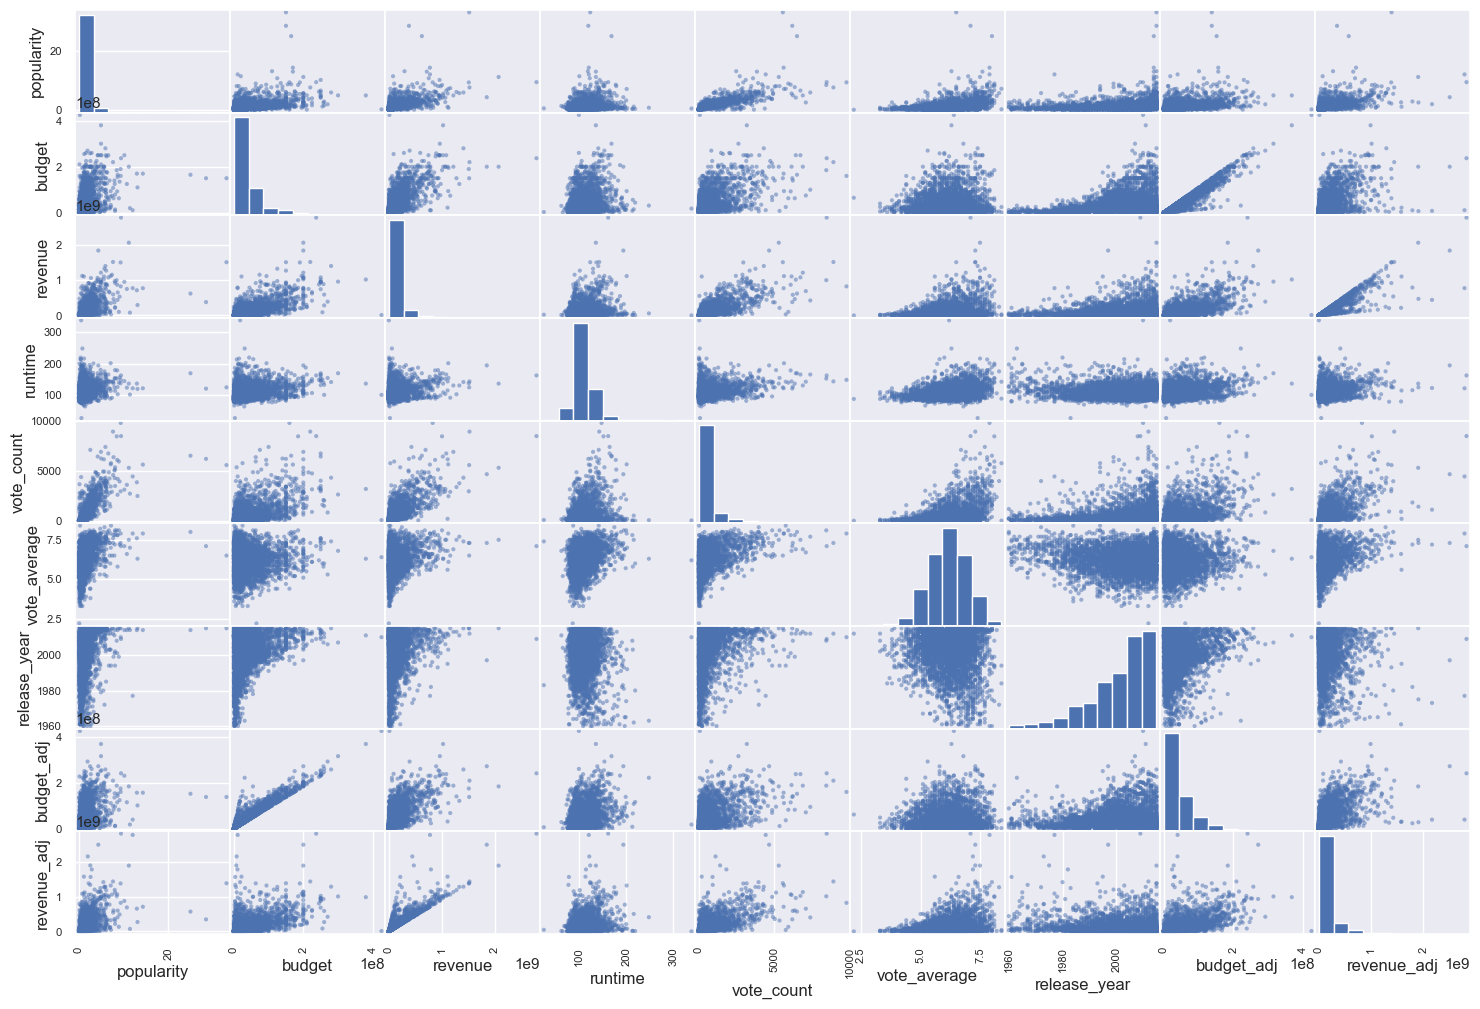

In [16]:
# We're going to add a scatter matrix to view a summary of relationships between all variables in this dataset
pd.plotting.scatter_matrix(df, figsize=(18,12),);

In [17]:
# creating a dataframe for the average running time
# We'll make us of the Groupby method

df_runtime = df.groupby('release_year')['runtime'].mean()
df_runtime.head()

release_year
1960    139.750000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
Name: runtime, dtype: float64

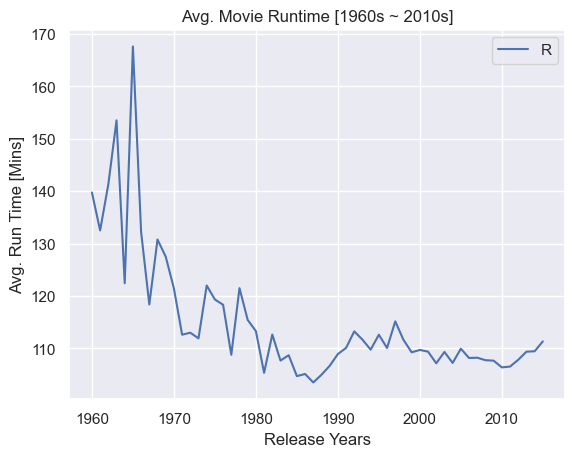

In [18]:
# Then we go ahead to plot this on a line chart to view the trend
df_runtime.plot.line();
plt.title('Avg. Movie Runtime [1960s ~ 2010s]')
plt.legend('Runtime trend')
plt.xlabel('Release Years')
plt.ylabel('Avg. Run Time [Mins]')
plt.show()

### 2. Does Movie Runtime Affect Popularity

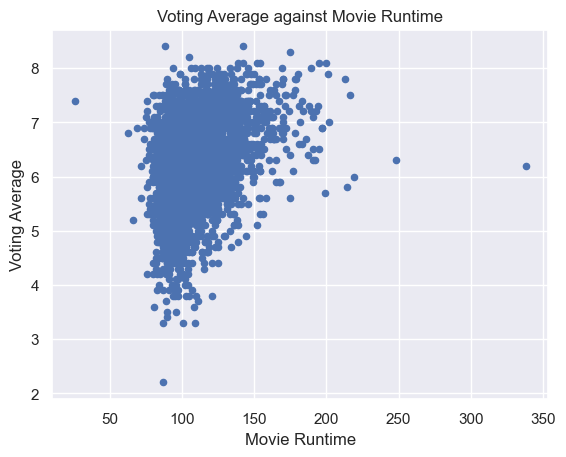

In [19]:
# From the above plot, it seems the run times of movies has significantly reduced to just over 110 minutes
# We then add the columns for average rating and average popularity
df.plot.scatter(x='runtime', y='vote_average');
plt.title('Voting Average against Movie Runtime')
plt.xlabel('Movie Runtime')
plt.ylabel('Voting Average')
plt.show()

From the above scatter plot, it seems that the runtime has some effect on the average vote,\
though the weight of influence is subject to further analysis

### 3. Top 5 Profitable Production Studios (Independent) of all time

In [20]:
# We want to see which independent studios have been the most profitable over the years
# Because we have a number of movies that are collaborations between studios, we need to isolate the independent entries
df = df[df['production_companies'].str.contains('|', regex=False) == False]
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
17,5.573184,130000000,518602163,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,Peyton Reed,marvel comic|superhero|aftercreditsstinger|dur...,115,Science Fiction|Action|Adventure,Marvel Studios,7/14/15,3779,7.0,2015,1.195999e+08,4.771138e+08
47,2.968254,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,Jake Schreier,friendship|high school|teen|classmate|based on...,109,Drama|Mystery|Romance,Fox 2000 Pictures,7/9/15,1252,6.2,2015,1.104000e+07,7.867128e+07
117,1.376605,30000000,105011053,Sisters,Tina Fey|Amy Poehler|John Leguizamo|Ike Barinh...,Jason Moore,sister sister relationship|childhood home,118,Comedy,Little Stranger,12/18/15,399,5.9,2015,2.759999e+07,9.661013e+07
120,1.355822,25000000,72629670,The Transporter Refueled,Ed Skrein|Ray Stevenson|Loan Chabanol|Gabriell...,Camille Delamarre,transporter|sequel|suspense|car|bank heist,96,Thriller|Action|Crime,EuropaCorp,9/3/15,407,5.3,2015,2.299999e+07,6.681927e+07
121,1.345982,55000000,74679822,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,haunted house|mining|murder|spitting blood|gothic,119,Mystery|Thriller|Fantasy|Horror|Drama,Legendary Pictures,10/13/15,819,6.4,2015,5.059998e+07,6.870541e+07


In [21]:
# We then include a new column to get the profit from each motion picture
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head()

C:\Temp\ipykernel_23388\1046590711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit_adj'] = df['revenue_adj'] - df['budget_adj']


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
17,5.573184,130000000,518602163,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,Peyton Reed,marvel comic|superhero|aftercreditsstinger|dur...,115,Science Fiction|Action|Adventure,Marvel Studios,7/14/15,3779,7.0,2015,1.195999e+08,4.771138e+08,3.575138e+08
47,2.968254,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,Jake Schreier,friendship|high school|teen|classmate|based on...,109,Drama|Mystery|Romance,Fox 2000 Pictures,7/9/15,1252,6.2,2015,1.104000e+07,7.867128e+07,6.763129e+07
117,1.376605,30000000,105011053,Sisters,Tina Fey|Amy Poehler|John Leguizamo|Ike Barinh...,Jason Moore,sister sister relationship|childhood home,118,Comedy,Little Stranger,12/18/15,399,5.9,2015,2.759999e+07,9.661013e+07,6.901014e+07
120,1.355822,25000000,72629670,The Transporter Refueled,Ed Skrein|Ray Stevenson|Loan Chabanol|Gabriell...,Camille Delamarre,transporter|sequel|suspense|car|bank heist,96,Thriller|Action|Crime,EuropaCorp,9/3/15,407,5.3,2015,2.299999e+07,6.681927e+07,4.381928e+07
121,1.345982,55000000,74679822,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,haunted house|mining|murder|spitting blood|gothic,119,Mystery|Thriller|Fantasy|Horror|Drama,Legendary Pictures,10/13/15,819,6.4,2015,5.059998e+07,6.870541e+07,1.810543e+07


In [22]:
# Finally we group this by studio and get the top 5
df_profit = df.groupby('production_companies')['profit_adj'].sum().sort_values(ascending=False) # I sorted the values to we can see who's at the top
df_profit.head()

production_companies
Paramount Pictures      9.197043e+09
DreamWorks Animation    4.624737e+09
Marvel Studios          4.432291e+09
Universal Pictures      4.365219e+09
Columbia Pictures       4.331362e+09
Name: profit_adj, dtype: float64

In [23]:
# The cell above isn't very readable to non-scientific folk
# So limit to the 5 largest in terms of profit and apply formatting to make the numbers readable
df_profit.nlargest(5).apply(lambda x: "${:.2f}B".format((x/1000000000)))

production_companies
Paramount Pictures      $9.20B
DreamWorks Animation    $4.62B
Marvel Studios          $4.43B
Universal Pictures      $4.37B
Columbia Pictures       $4.33B
Name: profit_adj, dtype: object

> We'll do the same code aagin, but use this to plot a bar chart

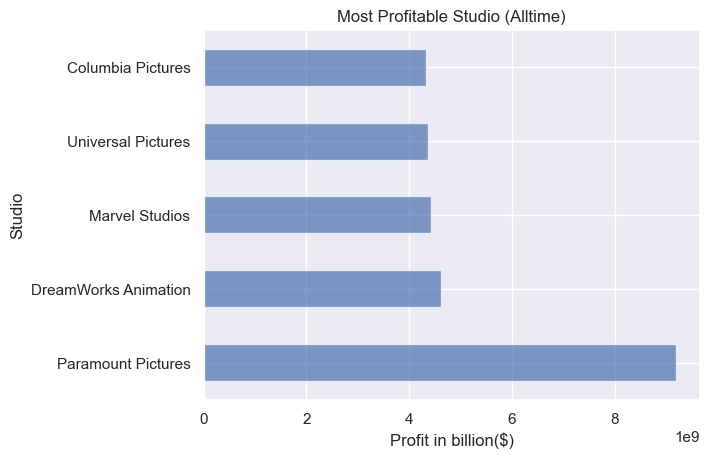

In [24]:
# The cell above isn't very readable to non-scientific folk
# So limit to the 5 largest in terms of profit and apply formatting to make the numbers readable
df_profit.nlargest(5).plot.barh(alpha = 0.7)
plt.title('Most Profitable Studio (Alltime)')
plt.xlabel('Profit in billion($)')
plt.ylabel('Studio')
plt.show()

<a id='conclusions'></a>
## Conclusions

> We can see first of all, on average, mvies have become shorter in recent years, and these runtimes have some effects on the ratings, but the exact degree or weight isn't determined in this analysis as so statistical techniques have been used

> Also, with a wopping `$9.20 Billion`, Paramount is the most profitable production studio of all time, almost **100%** more than the closest studio DreamWorks